In [11]:
import pandas as pd, sqlite3

conn = sqlite3.connect("../data/checking-logs.sqlite")

In [12]:
## Loading and filtering data from checker
query = """
SELECT timestamp
FROM checker 
WHERE uid like 'user%';
"""
commits = pd.read_sql(query, conn, parse_dates=["timestamp"])

In [13]:
## Adding time of day and date
commits["hour"] = commits["timestamp"].dt.hour
commits["date"] = commits["timestamp"].dt.date

def get_period(hour):
    if 0 <= hour < 4:
        return "night"
    elif 4 <= hour < 10:
        return "morning"
    elif 10 <= hour < 17:
        return "afternoon"
    else:
        return "evening"

commits["period"] = commits["hour"].apply(get_period)

In [14]:
## Grouping: date + period
daily_period = commits.groupby(["date", "period"]).size().unstack(fill_value=0)

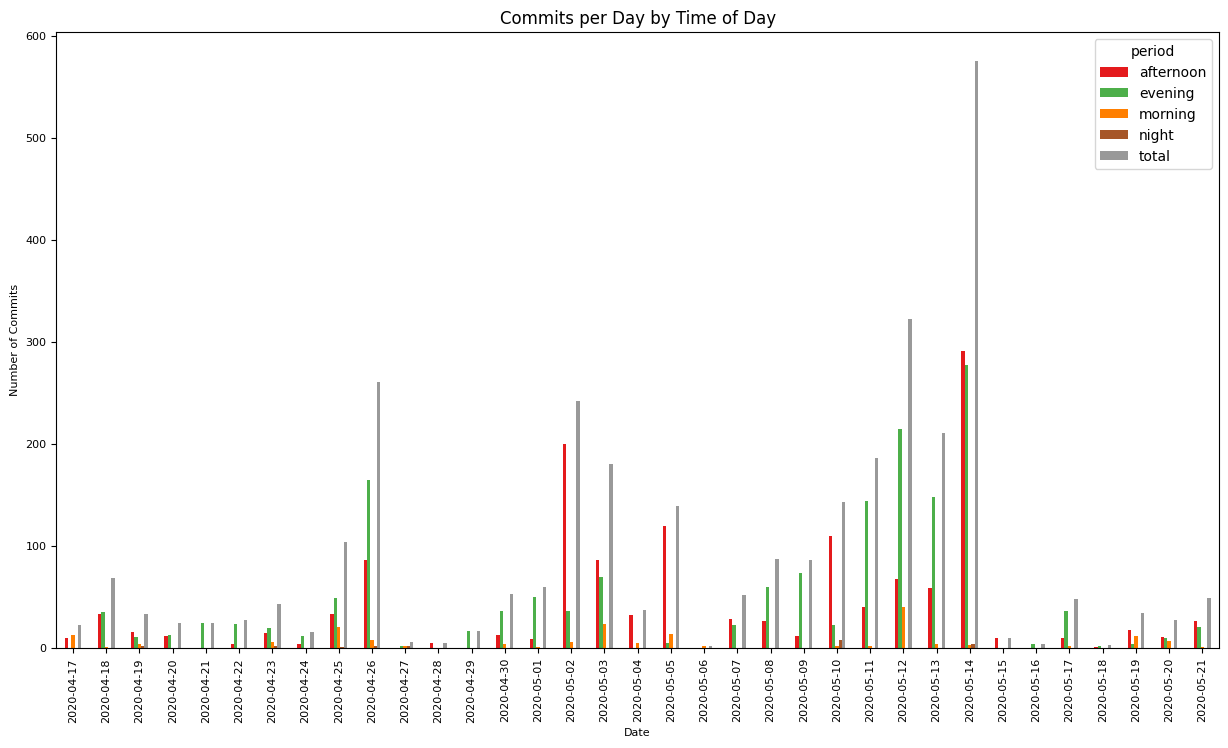

In [34]:
## bar chart
ax = daily_period.plot(
    kind="bar",
    stacked=False,
    figsize=(15, 8),
    fontsize=8,
    colormap="Set1",  
    title="Commits per Day by Time of Day"
)

ax.set_xlabel("Date", fontsize=8)
ax.set_ylabel("Number of Commits", fontsize=8)
ax.tick_params(axis='x', labelrotation=90)

In [36]:
## Analysis of periods
total_by_period = commits["period"].value_counts()
most_common_periods = total_by_period.head(2).index.tolist()
print("Our users usually commit the labs in the", most_common_periods)

Our users usually commit the labs in the ['evening', 'afternoon']


In [35]:
# Day with the highest total number of commits
daily_period["total"] = daily_period.sum(axis=1)
evening_more_than_afternoon = daily_period[daily_period["evening"] > daily_period["afternoon"]]
target_day = evening_more_than_afternoon["total"].idxmax()
print("The most number of commitsn in", target_day)

The most number of commitsn in 2020-05-12


In [12]:
conn.close()


## Вопросы
Когда наши пользователи чаще всего коммитят лабораторные: ночью, утром, днём или вечером?  
Ответ: днем и вечером

Какой день имеет:
- наибольшее количество коммитов
- и при этом вечером было больше коммитов, чем днём?

Ответ: **2020-05-12**
